In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, InputLayer, AveragePooling2D
from keras.utils import to_categorical
from sklearn.datasets import load_files
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, zero_one_loss
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
train_data = '/content/fruits-360/Train'
test_data = '/content/fruits-360/Test'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_data)
x_test, y_test,_ = load_dataset(test_data)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])


Loading complete!
Training set size :  67692
Testing set size :  22688


In [ ]:
no_of_classes = len(np.unique(y_train))
print('Numbe of classes : ', no_of_classes)
print('classes labels: ', target_labels)

Numbe of classes :  131
classes labels:  ['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo

In [ ]:
y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

In [ ]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


In [ ]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
class_distribution =  np.count_nonzero(y_train, axis = 0)
print(class_distribution)

y_ind_max = np.where(class_distribution == np.amax(class_distribution))
y_ind_min = np.where(class_distribution == np.amin(class_distribution))
print('\n max_instances = ', np.amax(class_distribution), target_labels[y_ind_max])
print(' min_instances =',np.amin(class_distribution), target_labels[y_ind_min])

[492 444 480 492 481 492 456 492 492 429 490 492 672 492 427 491 490 450
 490 450 462 490 492 492 490 702 492 738 738 492 492 492 450 490 490 450
 462 392 468 490 468 702 297 490 984 492 490 490 492 471 490 492 490 464
 490 490 466 471 490 492 490 490 490 490 490 426 300 490 738 492 492 480
 654 534 450 445 438 479 492 490 492 738 492 492 696 490 702 300 490 666
 711 490 490 444 702 666 666 492 492 490 493 490 447 420 900 492 450 450
 453 450 450 490 492 490 492 490 492 738 490 490 738 672 738 479 492 684
 367 459 474 735 475]

 max_instances =  984 ['Grape Blue']
 min_instances = 297 ['Ginger Root']


In [ ]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'valid samples')

x_train shape: (67692, 100, 100, 3)
67692 train samples
15688 test samples
7000 valid samples


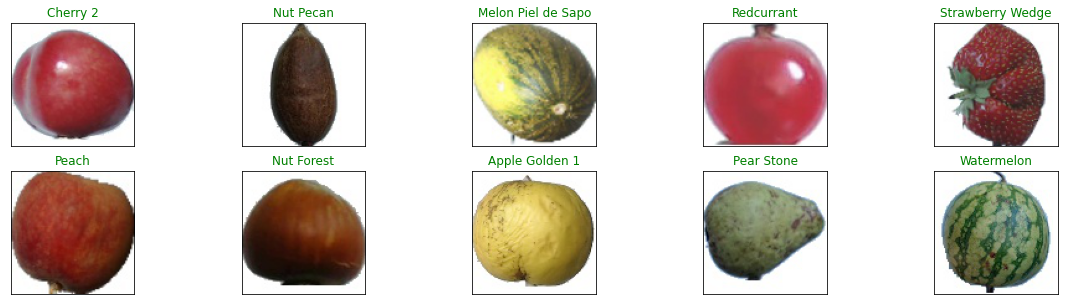

In [ ]:
fig = plt.figure(figsize =(20,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    train_idx = np.argmax(y_train[i])
    ax.set_title("{}".format(target_labels[train_idx]),
                 color="green")

In [ ]:
x_tune_2,x_tune_1 = x_train[20000:],x_train[:20000]
y_tune_2,y_tune_1 = y_train[20000:],y_train[:20000]
print(x_tune_2.shape, 'x_tune_2 samples')
print(x_tune_1.shape, 'x_tune_1 samples')

(47692, 100, 100, 3) x_tune_2 samples
(20000, 100, 100, 3) x_tune_1 samples


In [ ]:
def create_cnn_model(filter_depth = 8):
  #optimizers = 'adam'
  #number_layers = 3 
  #init = 'glorot_uniform' 
  #activation_f = 'relu' 
  #FC_neurons = 128
  #learning_rate = 0.01
  # create model
  model = Sequential()
  model.add(InputLayer(input_shape=(100, 100,3)))

  # 1st conv block

  model.add(Conv2D(filter_depth, (3, 3), activation= 'elu', strides=(1, 1), padding='same', kernel_initializer= 'he_uniform'))
  model.add(Conv2D(filter_depth, (3, 3), activation= 'elu', strides=(1, 1), padding='same', kernel_initializer= 'he_uniform'))
  model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

  # 2st conv block
  model.add(Conv2D(filter_depth * 2, (3, 3), activation = 'elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
  model.add(Conv2D(filter_depth * 2, (3, 3), activation = 'elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
  model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

  # 3st conv block
  model.add(Conv2D(filter_depth * 4, (3, 3), activation= 'elu', strides=(2, 2), padding='same'  , kernel_initializer= 'he_uniform'))
  model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
  '''
  if number_layers == 4:
    # 4nd conv block
    model.add(Conv2D(filter_depth * 8 , (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
  '''
  #if number_layers == 5:
  # 4nd conv block
  model.add(Conv2D(filter_depth * 8, (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
  model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
  # 5nd conv block
  model.add(Conv2D(filter_depth * 16, (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
  model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
  '''
  if number_layers == 6:
    # 4nd conv block
    model.add(Conv2D(filter_depth * 8, (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
    # 5nd conv block
    model.add(Conv2D(filter_depth * 16, (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
    # 6nd conv block
    model.add(Conv2D(filter_depth * 32, (3, 3), activation='elu', strides=(2, 2), padding='same' , kernel_initializer= 'he_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
  '''
  # ANN block
  model.add(Flatten())
  model.add(Dense(1024, activation="relu" , kernel_initializer= 'he_uniform'))
  model.add(Dense(512, activation="relu" , kernel_initializer= 'he_uniform'))

  # output layer
  model.add(Dense(131, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer= 'nadam', metrics=['accuracy'])
  return model


In [ ]:
# define function to display the results of the grid search
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))    

In [ ]:
# create model

model = KerasClassifier(build_fn=create_cnn_model, verbose=1, batch_size = 80, epochs =15)
# define parameters and values for grid search 
param_grid = {
    #'learning_rate' : [0.1, 0.001, 0.0001],
    #'number_layers' : [3, 4, 5, 6],
    #'FC_neurons' : [128, 256, 512, 1024],
    'filter_depth' : [8, 16, 32, 64],
    #'optimizers' : ['adam', 'rmsprop', 'Nadam', 'Adamax'],
    #'init' : ['glorot_uniform', 'uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'he_normal', 'he_uniform'],
    #'activation_f' : ['relu', 'elu', 'tanh']
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, return_train_score=True)
grid_result = grid.fit(x_tune_1, y_tune_1)  

# print out results
display_cv_results(grid_result)

Epoch 1/15
167/167 [==============================] - 2s 11ms/step - loss: 2.3740 - accuracy: 0.4235
Epoch 2/15
167/167 [==============================] - 2s 11ms/step - loss: 0.3351 - accuracy: 0.8987
Epoch 3/15
167/167 [==============================] - 2s 10ms/step - loss: 0.2446 - accuracy: 0.9399
Epoch 4/15
167/167 [==============================] - 2s 10ms/step - loss: 0.0594 - accuracy: 0.9833
Epoch 5/15
167/167 [==============================] - 2s 11ms/step - loss: 0.4186 - accuracy: 0.9286
Epoch 6/15
167/167 [==============================] - 2s 11ms/step - loss: 0.0309 - accuracy: 0.9941
Epoch 7/15
167/167 [==============================] - 2s 10ms/step - loss: 0.0444 - accuracy: 0.9895
Epoch 8/15
167/167 [==============================] - 2s 10ms/step - loss: 0.0087 - accuracy: 0.9986
Epoch 9/15
167/167 [==============================] - 2s 11ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 10/15
167/167 [==============================] - 2s 11ms/step - loss: 0.0013 - accura

In [ ]:
num_classes = 131
width = 100
height = 100
batch_size = 80
epochs = 30

In [ ]:
gen =ImageDataGenerator(rotation_range=0.5, width_shift_range=0.5, shear_range=0.3,
                               height_shift_range=0.5, zoom_range=0.5, vertical_flip=True, horizontal_flip=True)
train_batches = gen.fit(x_train)

In [ ]:
# The tuned CNN model
model = Sequential()
model.add(InputLayer(input_shape=(width, height,3)))

# 1st conv block
model.add(Conv2D(32, (3, 3), activation='elu', strides=(1, 1), padding='same', kernel_initializer= 'he_uniform'))
model.add(Conv2D(32, (3, 3), activation='elu', strides=(1, 1), padding='same', kernel_initializer= 'he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 2st conv block
model.add(Conv2D(64, (3, 3), activation='elu', strides=(2, 2), padding='same', kernel_initializer= 'he_uniform'))
model.add(Conv2D(64, (3, 3), activation='elu', strides=(2, 2), padding='same', kernel_initializer= 'he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 3st conv block
model.add(Conv2D(128, (3, 3), activation='elu', strides=(2, 2), padding='same', kernel_initializer= 'he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 4nd conv block
model.add(Conv2D(256, (3, 3), activation='elu', strides=(2, 2), padding='same', kernel_initializer= 'he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 5nd conv block
model.add(Conv2D(512, (3, 3), activation='elu', strides=(2, 2), padding='same', kernel_initializer= 'he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# ANN block
model.add(Flatten())
model.add(Dense(1024, activation="relu", kernel_initializer= 'he_uniform'))
model.add(Dense(512, activation="relu", kernel_initializer= 'he_uniform'))

# output layer
model.add(Dense(num_classes, activation='softmax'))

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose=1, restore_best_weights= True)



In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 4, 4, 128)       

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Nadam(), metrics=['accuracy'])

history = model.fit_generator(gen.flow(x_train,y_train, batch_size=batch_size), epochs=epochs, 
                     validation_data= (x_valid, y_vaild), verbose = 1, 
                     steps_per_epoch= x_train.shape[0] // batch_size, shuffle = True, callbacks = [early_stop])

Epoch 1/30
846/846 [==============================] - 150s 177ms/step - loss: 1.8589 - accuracy: 0.4833 - val_loss: 0.4361 - val_accuracy: 0.8607
Epoch 2/30
846/846 [==============================] - 152s 180ms/step - loss: 0.5037 - accuracy: 0.8351 - val_loss: 0.1824 - val_accuracy: 0.9437
Epoch 3/30
846/846 [==============================] - 147s 174ms/step - loss: 0.3531 - accuracy: 0.8827 - val_loss: 0.1454 - val_accuracy: 0.9507
Epoch 4/30
846/846 [==============================] - 151s 178ms/step - loss: 0.3549 - accuracy: 0.8919 - val_loss: 0.3714 - val_accuracy: 0.8860
Epoch 5/30
846/846 [==============================] - 153s 181ms/step - loss: 0.2531 - accuracy: 0.9172 - val_loss: 0.1544 - val_accuracy: 0.9447
Epoch 6/30
846/846 [==============================] - 155s 183ms/step - loss: 0.2279 - accuracy: 0.9267 - val_loss: 0.0811 - val_accuracy: 0.9703
Epoch 7/30
846/846 [==============================] - 152s 180ms/step - loss: 0.2081 - accuracy: 0.9344 - val_loss: 0.1044 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

197/197 [==============================] - 2s 9ms/step - loss: 0.0361 - accuracy: 0.9924
Test loss: 0.036123622208833694
Test accuracy: 99.23508167266846


In [ ]:
import json
with open('myfile.json', 'w') as file:
    json.dump(history.history, file)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_99.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_99.h5")
print("Saved model to disk")
  

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model_99.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_99.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 99.24%


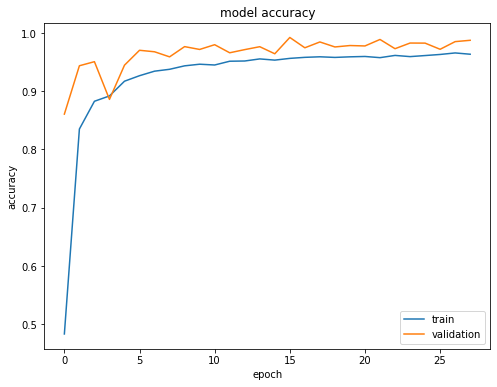

In [ ]:
 # summarize history for accuracy  
figure,ax=plt.subplots(figsize=(8,6))
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='lower right')  
figure.savefig('model_Acc_99.png')  
plt.show() 

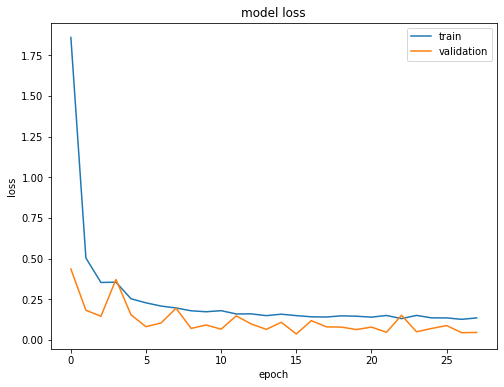

In [ ]:
 # summarize history for loss  
figure,ax=plt.subplots(figsize=(8,6))
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper right')  
figure.savefig('model_loss_99.png')  
plt.show()

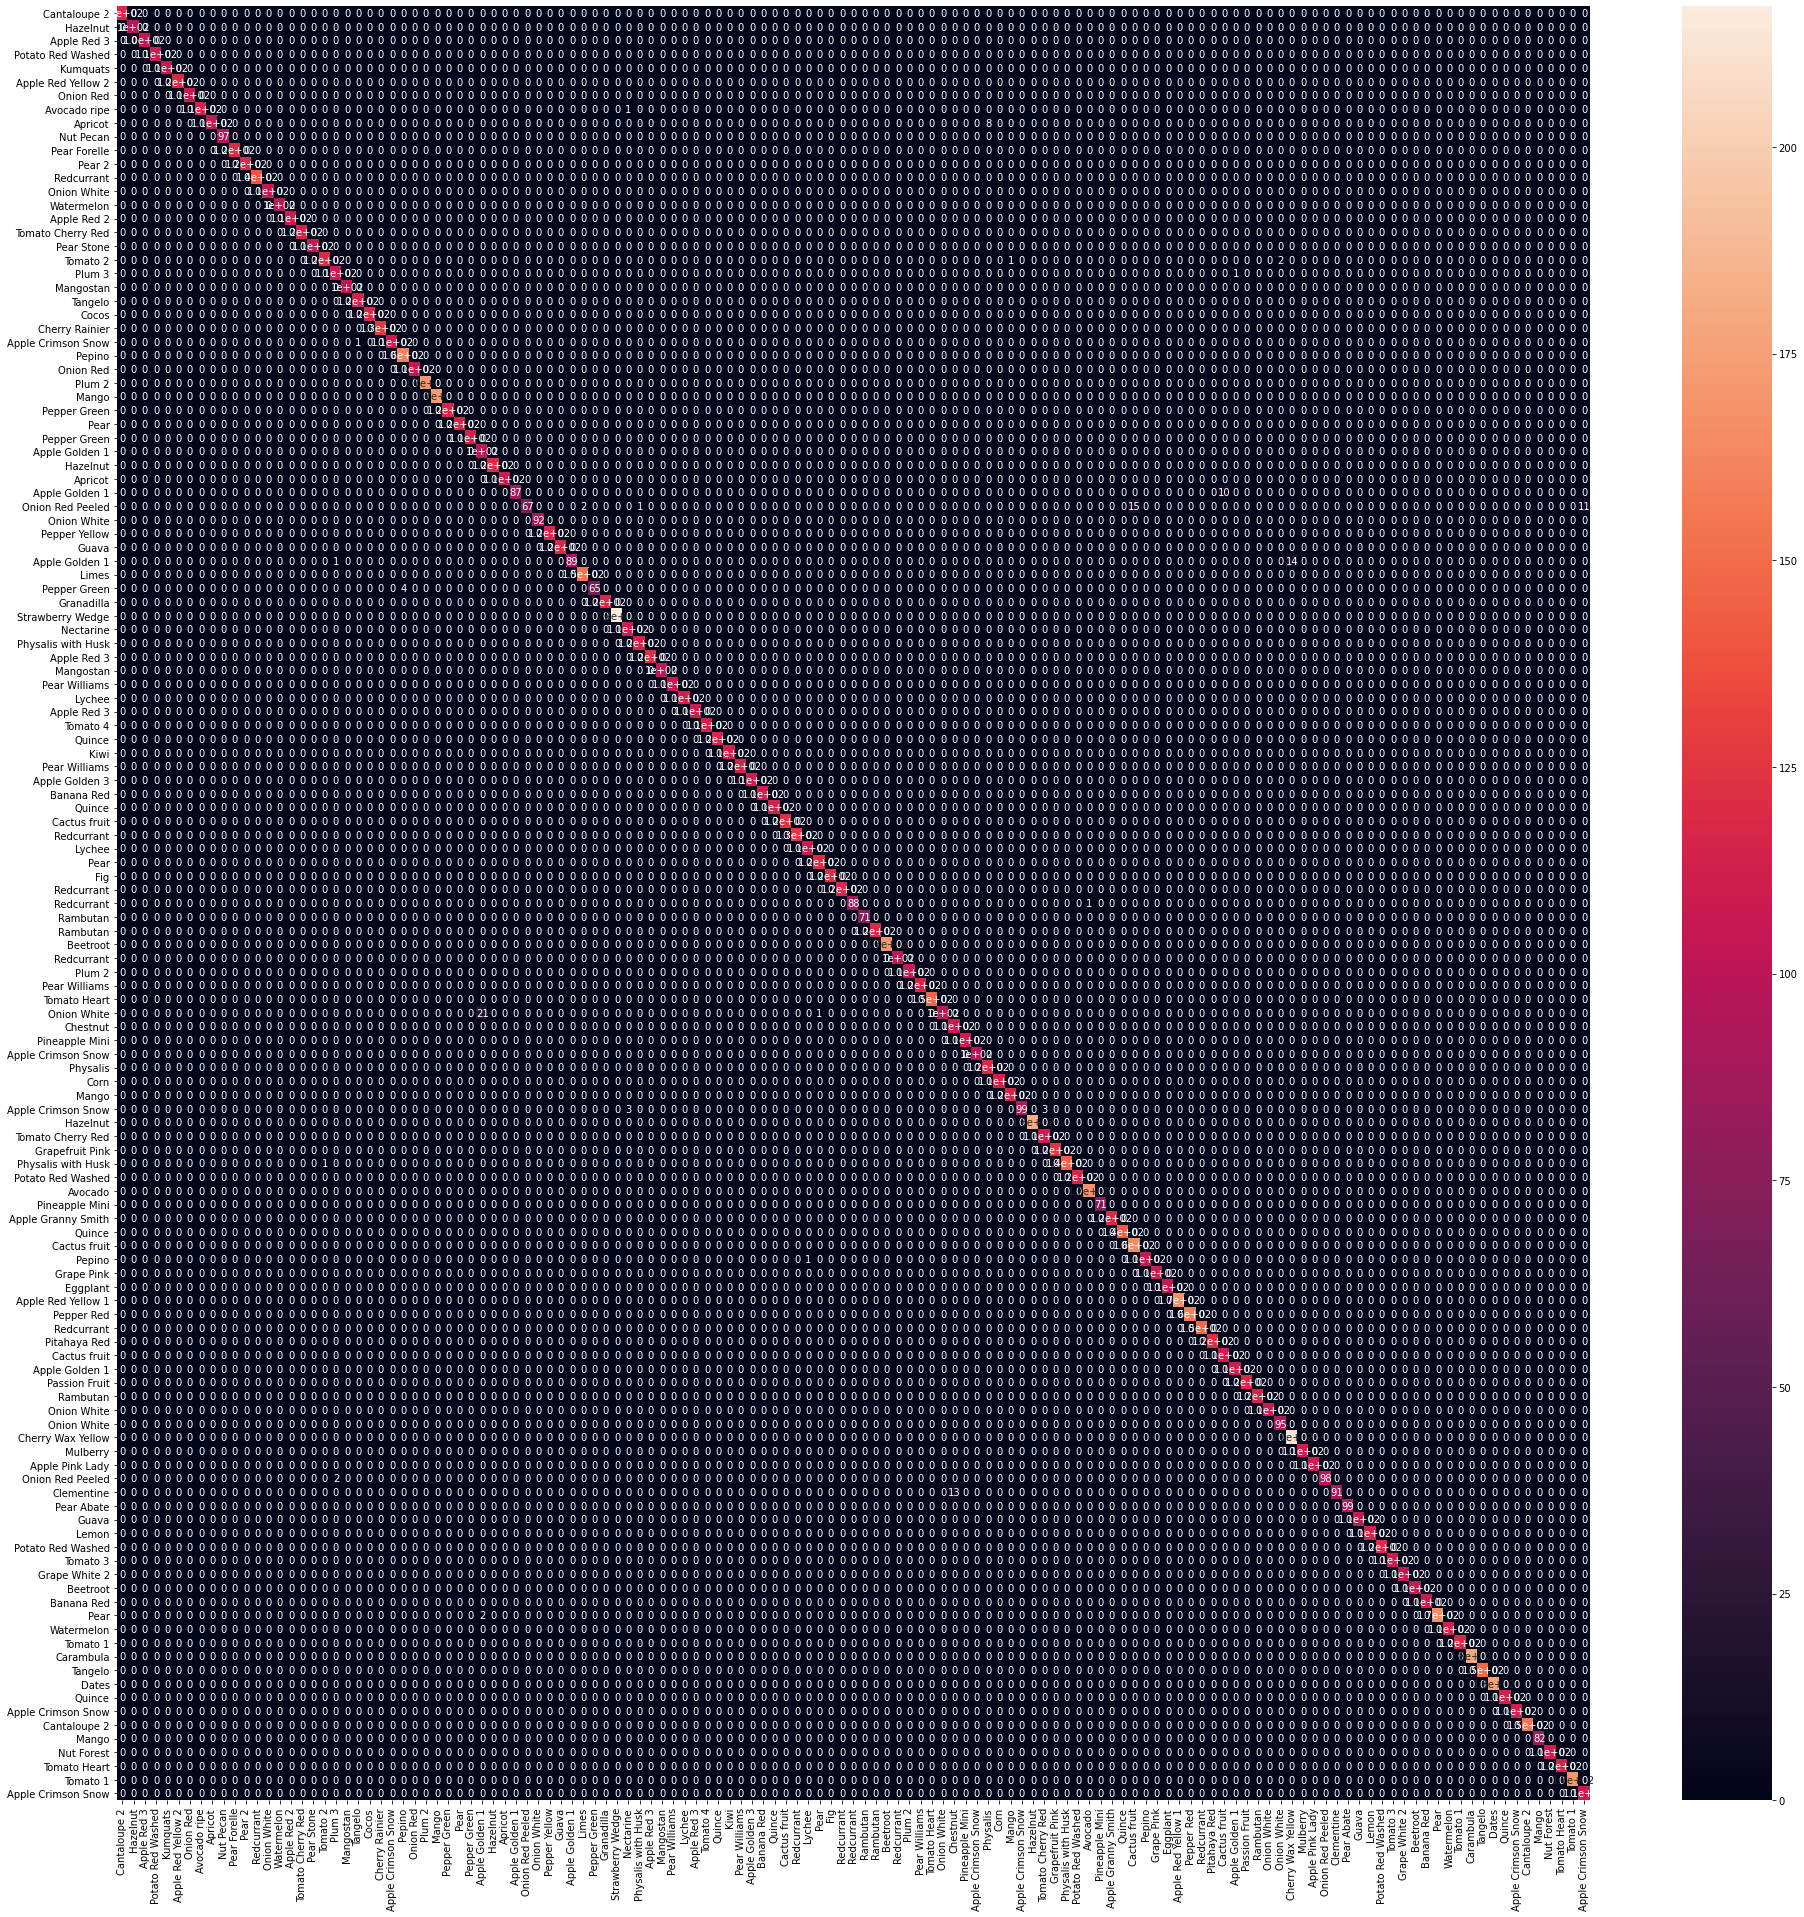

In [ ]:
#confusion matrix
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=target_labels[y_true]
figure,ax=plt.subplots(figsize=(33,33))
sns.heatmap(conf_mat,annot=True)
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
figure.savefig('heatmap_99.png')  
plt.show()

In [ ]:
print(y_true)
print(y_pred_classes)

[23 53  9 ... 58 64 16]
[23 53  9 ... 58 64 16]


In [ ]:

f1 = f1_score(y_true, y_pred_classes, average ='micro')
print('f1_score = ', f1)
print('confusion_matrix  :\n ', conf_mat )

f1_score =  0.9923508414074452
confusion_matrix  :
  [[117   0   0 ...   0   0   0]
 [  0 101   0 ...   0   0   0]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ... 115   0   0]
 [  0   0   0 ...   0 171   0]
 [  0   0   0 ...   0   0 109]]


In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       110
           4       1.00      1.00      1.00       106
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00       107
           7       1.00      0.99      1.00       114
           8       1.00      0.93      0.96       114
           9       1.00      1.00      1.00        97
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00       141
          13       1.00      1.00      1.00       106
          14       1.00      1.00      1.00       104
          15       1.00      1.00      1.00       109
          16       1.00      1.00      1.00       116
          17       1.00    

In [ ]:
zero_loss = zero_one_loss(y_true, y_pred_classes)
print('zero_one_loss: ' , zero_loss)

zero_one_loss:  0.007649158592554772


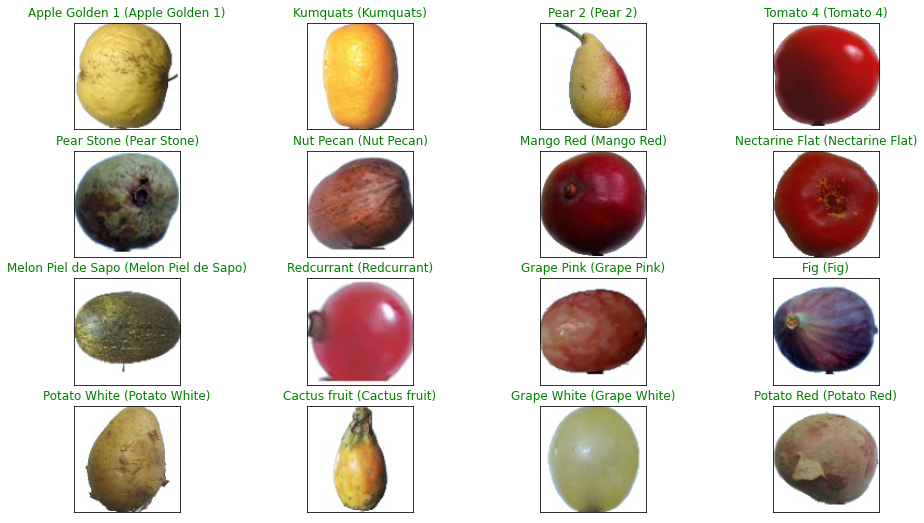

In [ ]:

y_pred=model.predict(x_test)
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    fig.savefig('some_sample_pred_99.png')  